In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy as stats

In [230]:
df = pd.read_csv("C:/Users/micha/Downloads/us-census-data/adult-training.csv",
                names= ['age','workclass','final_weight','education','education_num','marital_status','occupation','relationship',
             'race','sex','capital_gain','capital_loss','hours_per_week','native_country','salary_range'],index_col=False,skipinitialspace=True)
data = pd.DataFrame(df) # needed to make this a dataframe in order to .loc correctly

In [231]:
data.shape

(32561, 15)

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
final_weight      32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
salary_range      32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [233]:
data.drop_duplicates(inplace=True)

In [234]:
data.reindex()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [235]:
data["workclass"]

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
32556             Private
32557             Private
32558             Private
32559             Private
32560        Self-emp-inc
Name: workclass, Length: 32537, dtype: object

In [236]:
data.isnull().sum()/data.shape[0]

age               0.0
workclass         0.0
final_weight      0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
salary_range      0.0
dtype: float64

In [237]:
data.isnull().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary_range      0
dtype: int64

In [238]:
(data["age"]<=0).any()

False

In [239]:
data.dropna(inplace=True)

In [240]:
data

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [241]:
data["final_weight"].describe()

count    3.253700e+04
mean     1.897808e+05
std      1.055565e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.369930e+05
max      1.484705e+06
Name: final_weight, dtype: float64

In [242]:
data['education'].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [243]:
data['marital_status'].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [244]:
data["race"].value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [245]:
data.dtypes 

age                int64
workclass         object
final_weight       int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
salary_range      object
dtype: object

In [246]:
new_df = data.copy()
new_df

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [247]:
new_data = pd.get_dummies(new_df,columns = ["sex","salary_range"],drop_first = True)
new_data

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,salary_range_>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,1,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,1,0


In [248]:
new_data.dtypes

age                   int64
workclass            object
final_weight          int64
education            object
education_num         int64
marital_status       object
occupation           object
relationship         object
race                 object
capital_gain          int64
capital_loss          int64
hours_per_week        int64
native_country       object
sex_Male              uint8
salary_range_>50K     uint8
dtype: object

In [249]:
(new_data["workclass"] == "?").sum()

1836

In [250]:
new_data.loc[new_data["workclass"]=="?"]

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,salary_range_>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,0,0,60,South,1,1
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,0,0,40,?,1,0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,0,0,40,United-States,1,0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,0,0,2,United-States,1,0
106,17,?,304873,10th,6,Never-married,?,Own-child,White,34095,0,32,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,0,0,55,United-States,0,1
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,0,0,99,United-States,0,0
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,0,0,10,United-States,1,1
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,0,0,32,United-States,0,0


In [251]:
new_data["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [252]:
new_data["occupation"].value_counts() # 7 values without occupation those are the never worked i believe

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [253]:
new_data["age"].describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [254]:
new_data['salary_range_>50K'].value_counts()

0    24698
1     7839
Name: salary_range_>50K, dtype: int64

In [255]:
# consider label/one hot encoder for categorical data

In [256]:
new_data["workclass"].apply(lambda x:str(x).lower().replace("-","").strip())

0             stategov
1        selfempnotinc
2              private
3              private
4              private
             ...      
32556          private
32557          private
32558          private
32559          private
32560       selfempinc
Name: workclass, Length: 32537, dtype: object

In [257]:
new_data["education"].astype(str)

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32537, dtype: object

In [258]:
new_data["education"].apply(lambda x:str(x).lower().replace("-","").strip())

0        bachelors
1        bachelors
2           hsgrad
3             11th
4        bachelors
           ...    
32556    assocacdm
32557       hsgrad
32558       hsgrad
32559       hsgrad
32560       hsgrad
Name: education, Length: 32537, dtype: object

In [259]:
new_data["marital_status"].apply(lambda x:str(x).lower().replace("-","").strip())

0            nevermarried
1        marriedcivspouse
2                divorced
3        marriedcivspouse
4        marriedcivspouse
               ...       
32556    marriedcivspouse
32557    marriedcivspouse
32558             widowed
32559        nevermarried
32560    marriedcivspouse
Name: marital_status, Length: 32537, dtype: object

In [260]:
new_data["relationship"].apply(lambda x:str(x).lower().replace("-","").strip())

0        notinfamily
1            husband
2        notinfamily
3            husband
4               wife
            ...     
32556           wife
32557        husband
32558      unmarried
32559       ownchild
32560           wife
Name: relationship, Length: 32537, dtype: object

In [261]:
new_data["native_country"].apply(lambda x:str(x).lower().replace("-","").strip())

0        unitedstates
1        unitedstates
2        unitedstates
3        unitedstates
4                cuba
             ...     
32556    unitedstates
32557    unitedstates
32558    unitedstates
32559    unitedstates
32560    unitedstates
Name: native_country, Length: 32537, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B46CFDEF0>,
      dtype=object)

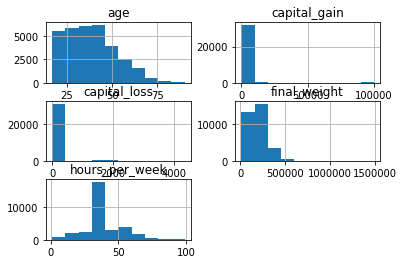

In [262]:
new_data.hist(["hours_per_week","capital_gain","capital_loss","final_weight","age"])

In [263]:
new_data["capital_loss"].value_counts()

0       31018
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital_loss, Length: 92, dtype: int64

In [264]:
numeric = new_data._get_numeric_data()
numeric

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week,sex_Male,salary_range_>50K
0,39,77516,13,2174,0,40,1,0
1,50,83311,13,0,0,13,1,0
2,38,215646,9,0,0,40,1,0
3,53,234721,7,0,0,40,1,0
4,28,338409,13,0,0,40,0,0
...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0
32557,40,154374,9,0,0,40,1,1
32558,58,151910,9,0,0,40,0,0
32559,22,201490,9,0,0,20,1,0


In [268]:
outliers = new_data[(new_data["capital_loss"]< new_data["capital_loss"].quantile(.995))&(new_data["capital_loss"]> new_data["capital_loss"].quantile(.005))]

In [270]:
outliers = new_data[(new_data["capital_gain"]< new_data["capital_gain"].quantile(.995))&(new_data["capital_gain"]> new_data["capital_gain"].quantile(.005))]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B471E0668>]],
      dtype=object)

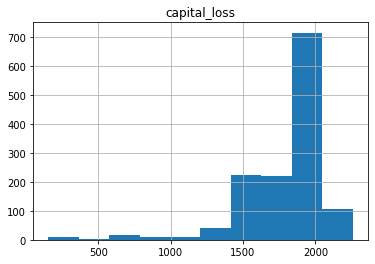

In [269]:
outliers.hist("capital_loss")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B47258CF8>]],
      dtype=object)

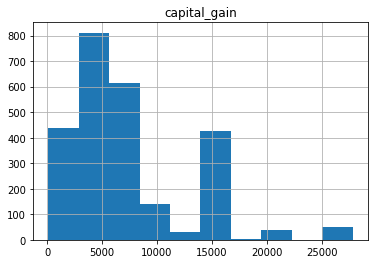

In [271]:
outliers.hist("capital_gain")

In [272]:
new_data.to_csv("cleaning Adult census project.csv")